In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
data.shape

(30711, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30711 entries, 0 to 30710
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            30711 non-null  object 
 1   Summary                   30711 non-null  object 
 2   Precip Type               30711 non-null  object 
 3   Temperature (C)           30711 non-null  float64
 4   Apparent Temperature (C)  30711 non-null  float64
 5   Humidity                  30711 non-null  float64
 6   Wind Speed (km/h)         30711 non-null  float64
 7   Wind Bearing (degrees)    30711 non-null  float64
 8   Visibility (km)           30711 non-null  float64
 9   Loud Cover                30710 non-null  float64
 10  Pressure (millibars)      30710 non-null  float64
 11  Daily Summary             30710 non-null  object 
dtypes: float64(8), object(4)
memory usage: 2.8+ MB


In [6]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
30706   2009-06-01 08:00:00+00:00
30707   2009-06-01 09:00:00+00:00
30708   2009-06-01 10:00:00+00:00
30709   2009-06-01 11:00:00+00:00
30710   2009-06-01 12:00:00+00:00
Name: Formatted Date, Length: 30711, dtype: datetime64[ns, UTC]

In [7]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,30711.000000,30711.000000,30711.000000,30711.000000,30711.000000,30711.000000,30710.0,30710.000000
mean,11.699722,10.557827,0.718858,10.844690,190.244961,10.079734,0.0,1000.698819
std,9.720464,10.845200,0.192263,6.935478,106.223321,3.773028,0.0,129.262036
min,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.075000,1.847222,0.590000,5.787950,120.000000,9.676100,0.0,1011.880000
50%,11.216667,11.216667,0.770000,9.869300,187.000000,9.982000,0.0,1016.720000
75%,18.838889,18.838889,0.870000,14.232400,290.000000,11.270000,0.0,1021.900000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [8]:
data = data.set_index("Formatted Date")
data.head(2)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [9]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
data_monthly_mean = data[data_columns].resample('MS').mean()
data_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


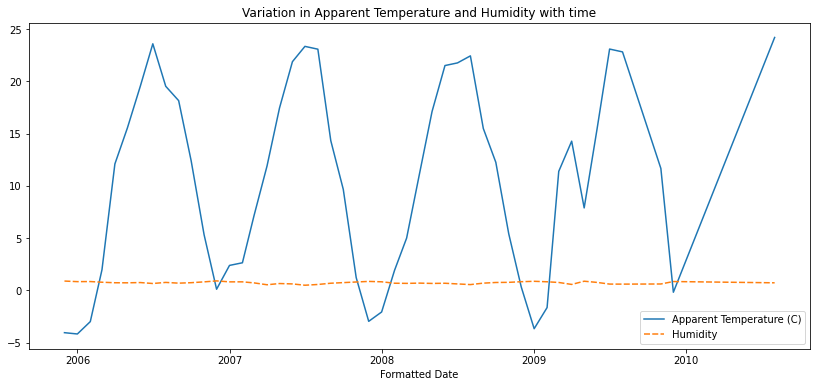

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=data_monthly_mean)

In [11]:
data1 = data_monthly_mean[data_monthly_mean.index.month==4]
print(data1)
data1.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-01 00:00:00+00:00                 12.098827  0.728625
2007-04-01 00:00:00+00:00                 11.894421  0.536361
2008-04-01 00:00:00+00:00                 11.183688  0.693194
2009-04-01 00:00:00+00:00                 14.276640  0.567284
2010-04-01 00:00:00+00:00                       NaN       NaN


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Text(0.5, 0, 'Month of April')

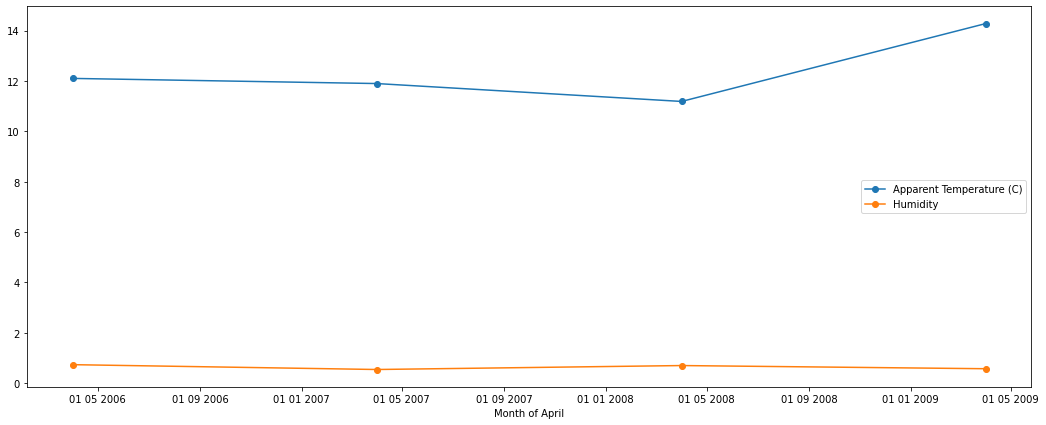

In [12]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(data1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(data1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
#ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc ='center right')
ax.set_xlabel('Month of April')

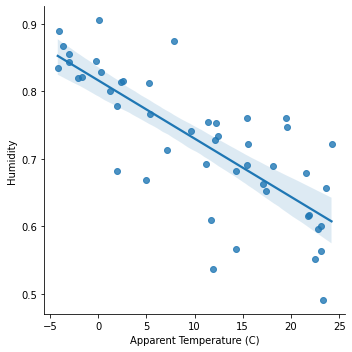

In [13]:
sns.lmplot(x='Apparent Temperature (C)',y='Humidity',data=data_monthly_mean)
plt.show()

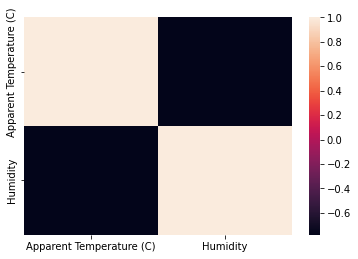

In [14]:
corr = data_monthly_mean.corr()
sns.heatmap(corr)

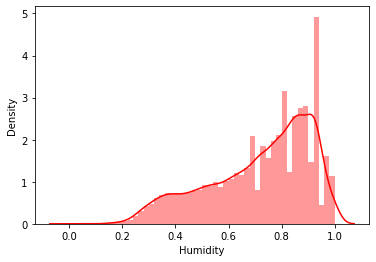

In [15]:
sns.distplot(data.Humidity,color='red')

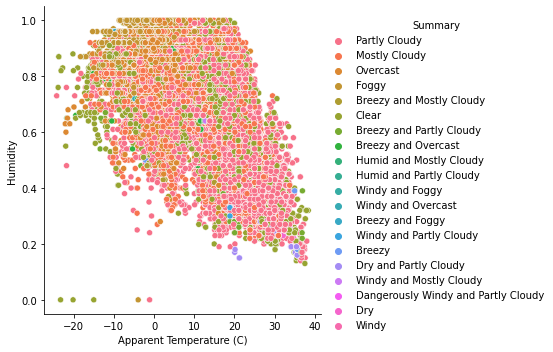

In [16]:
sns.relplot(data=data,x="Apparent Temperature (C)",y="Humidity",color="purple",hue="Summary")